In [31]:
import subprocess
import pandas as pd
import numpy as np
import warnings

# Function to run the experiment and capture output
def run_experiment(extadj, rate, file, topk):
    command = [
        "python", "main.py",
        f"--importextadj={extadj}",
        f"--privacy_amplify_sampling_rate={rate}",
        "--data_file=data/cora_ml",
        f"--extadjfile={file}",
        f"--topk={topk}"
    ]

    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')

    output = result.stdout
    accuracy = None
    for line in output.splitlines()[-10:]:
        if "Testing accuracy" in line:
            try:
                accuracy = float(line.split(":")[1].strip())
            except ValueError:
                accuracy = None
            break

    return accuracy


In [33]:
#default dpar, random node sampling
topk_values = [2, 4, 6, 8]
runs = 15
means_default = []
stds_default = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=False, rate=0.1, file=None, topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_default.append(m)
    stds_default.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")


Topk 2: mean accuracy = 0.7412, std = 0.0416
Topk 4: mean accuracy = 0.7040, std = 0.0567
Topk 6: mean accuracy = 0.7311, std = 0.0734
Topk 8: mean accuracy = 0.7218, std = 0.0391


Testing for Forest fire based sampling:

Topk 2: mean accuracy = 0.7055, std = 0.0746
Topk 4: mean accuracy = 0.7269, std = 0.0698
Topk 6: mean accuracy = 0.7137, std = 0.0437
Topk 8: mean accuracy = 0.7439, std = 0.0373


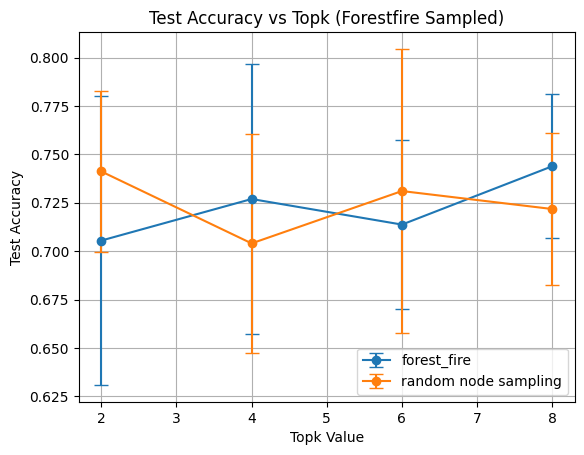

In [35]:
import matplotlib.pyplot as plt

means_forest = []
std_forest = []
stats_forest = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/forestfire10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_forest.append(m)
    std_forest.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_forest, yerr=std_forest, fmt='-o', capsize=5, label = 'forest_fire')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Forestfire Sampled)')
plt.grid(True)
plt.legend()
plt.show()

Random Walk Sampled

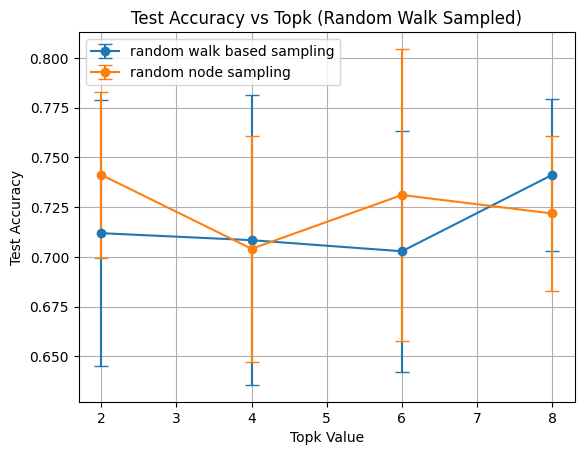

In [ ]:
means_randomwalk = []
std_randomwalk = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/randomwalk10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_randomwalk.append(m)
    std_randomwalk.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_randomwalk, yerr=std_randomwalk, fmt='-o', capsize=5, label = 'random walk based sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Random Walk Sampled)')
plt.grid(True)
plt.legend()
plt.show()

Common Neighbour

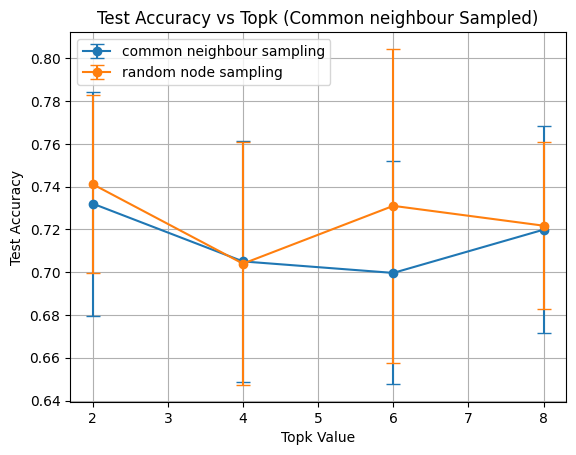

In [ ]:
means_commonneigh = []
std_commonneigh = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/commonneighbour10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_commonneigh.append(m)
    std_commonneigh.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_commonneigh, yerr=std_commonneigh, fmt='-o', capsize=5, label= 'common neighbour sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Common neighbour Sampled)')
plt.grid(True)
plt.legend()
plt.show()

Frontier Sampling

Topk 2: mean accuracy = 0.7383, std = 0.0643
Topk 4: mean accuracy = 0.7340, std = 0.0686
Topk 6: mean accuracy = 0.7552, std = 0.0296
Topk 8: mean accuracy = 0.7389, std = 0.0588


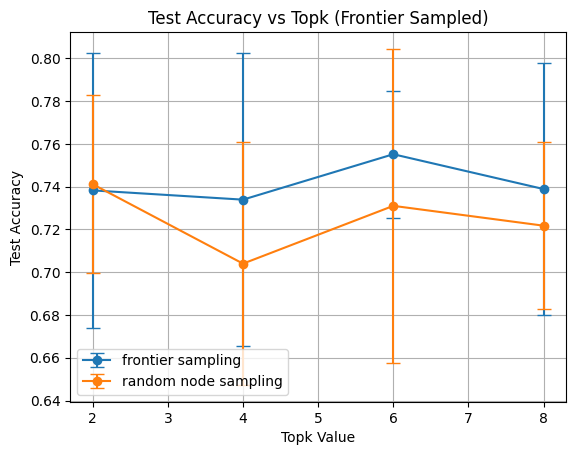

In [38]:
means_frontier = []
std_frontier = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/frontier10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_frontier.append(m)
    std_frontier.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_frontier, yerr=std_frontier, fmt='-o', capsize=5, label ='frontier sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Frontier Sampled)')
plt.grid(True)
plt.legend()
plt.show()